# External Validity

## Import libraries

In [1]:
#!pip install statsmodels

In [2]:
#!pip install matplotlib seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest

## Tasks

### Primacy Effect

#### Task 1.

 **What is the conversion difference in group A and group B?**

In [4]:
df = pd.read_csv('external_validity_homework_2.csv',
                 parse_dates=['date_in_app', 'first_date_in_app'])

In [5]:
df

,user_id,sample_type,date_in_app,first_date_in_app,day_of_test,conv_to_contact_daily
0,00018D9EB5E146AA8B578E427AEC323A,A,2023-07-02,2023-07-02,22,0
1,00018D9EB5E146AA8B578E427AEC323A,A,2023-07-06,2023-07-02,26,0
2,00018D9EB5E146AA8B578E427AEC323A,A,2023-07-08,2023-07-02,28,0
3,00018D9EB5E146AA8B578E427AEC323A,A,2023-07-09,2023-07-02,29,0
4,00027C4F85D64F4A81E95ECCCA1634FE,B,2023-06-14,2023-06-14,4,0
...,...,...,...,...,...,...
713951,FFFE37BB811E410F9617079E4F74CB8A,A,2023-07-04,2023-06-28,24,1
713952,FFFE37BB811E410F9617079E4F74CB8A,A,2023-07-03,2023-06-28,23,1
713953,FFFE37BB811E410F9617079E4F74CB8A,A,2023-07-05,2023-06-28,25,1
713954,FFFE37BB811E410F9617079E4F74CB8A,A,2023-07-08,2023-06-28,28,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713956 entries, 0 to 713955
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                713956 non-null  object        
 1   sample_type            713956 non-null  object        
 2   date_in_app            713956 non-null  datetime64[ns]
 3   first_date_in_app      713956 non-null  datetime64[ns]
 4   day_of_test            713956 non-null  int64         
 5   conv_to_contact_daily  713956 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 32.7+ MB


In [7]:
df.user_id.nunique()

97041

In [8]:
df_exp = df.groupby(['user_id', 'sample_type'], as_index=False) \
    .agg({'conv_to_contact_daily': 'max'})

In [9]:
df_exp

,user_id,sample_type,conv_to_contact_daily
0,00018D9EB5E146AA8B578E427AEC323A,A,0
1,00027C4F85D64F4A81E95ECCCA1634FE,B,0
2,000372E63801450086F7C385F3EFA844,B,1
3,0003A45019354C9C88F0D42D1C7DFB7C,B,1
4,0005769859DE4BFD9BB266A007231F2B,B,1
...,...,...,...
97036,FFFBDEC2FD98444CBDCA4E1F0028EB7B,A,0
97037,FFFCB6AE38FB4A9586735543F89C2704,A,1
97038,FFFCD3187A434DAE9F81984043CEE349,A,0
97039,FFFE37BB811E410F9617079E4F74CB8A,A,1


In [10]:
df_exp.sample_type.value_counts()

A    48750
B    48291
Name: sample_type, dtype: int64

In [11]:
conv_res = df_exp.groupby('sample_type', as_index=False).agg({'conv_to_contact_daily': 'mean'})

conv_res

,sample_type,conv_to_contact_daily
0,A,0.878626
1,B,0.864799


In [12]:
conv_res.conv_to_contact_daily[1] - conv_res.conv_to_contact_daily[0]

-0.01382681722824608

#### Task 2.  

**Check the proportion in each group using a two-tailed z-test for proportion. And specify the z-statistic obtained in the test.** 

In [13]:
grp_a = df_exp[df_exp['sample_type'] == 'A'].conv_to_contact_daily
grp_b = df_exp[df_exp['sample_type'] == 'B'].conv_to_contact_daily

In [14]:
count = [sum([x for x in grp_a if x > 0]), sum([x for x in grp_b if x > 0])]
nobs = [len(grp_a), len(grp_b)]

proportions_ztest(count, nobs)[0]

6.440699209685541

#### Task 3. 

**Can we reject H0 if alpha = 0.05?**

In [15]:
if proportions_ztest(count, nobs)[1] < 0.05:
    print('Yes, we can reject H0!')
else:
    print('We are not able to reject H0.')

Yes, we can reject H0!


#### Task 4. 

**We have to check if there is a primacy effect on our data.**

In [16]:
df['ret_day'] = df['date_in_app'] - df['first_date_in_app']

In [17]:
df['ret_day'] = df['ret_day'].dt.days

In [18]:
df['user_type'] = pd.cut(df['ret_day'], bins=[-1, 3, 1000], labels=['new', 'old'])

In [19]:
to_plot = df.groupby(['day_of_test', 'sample_type', 'user_type'], as_index=False) \
    .agg({'conv_to_contact_daily': 'mean'})

In [20]:
to_plot['user_cat'] = to_plot['sample_type'].str.cat(to_plot['user_type'], sep=' - ')

to_plot

,day_of_test,sample_type,user_type,conv_to_contact_daily,user_cat
0,0,A,new,0.756906,A - new
1,0,A,old,0.800440,A - old
2,0,B,new,0.732095,B - new
3,0,B,old,0.355282,B - old
4,1,A,new,0.729223,A - new
...,...,...,...,...,...
115,28,B,old,0.797143,B - old
116,29,A,new,0.743386,A - new
117,29,A,old,0.828243,A - old
118,29,B,new,0.787709,B - new


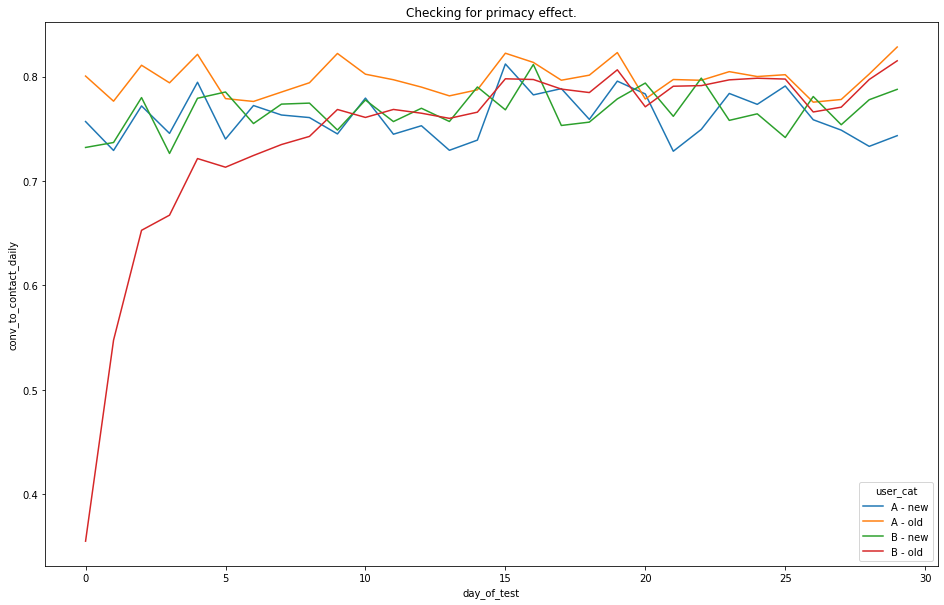

In [21]:
plt.figure(figsize=(16,10))

sns.lineplot(data=to_plot, x='day_of_test', y='conv_to_contact_daily', hue='user_cat')
plt.title('Checking for primacy effect.');


There is a primacy effect based on what we can see on the graph above. 

#### Task 5. 

**Calculate the average daily share of new users by test days (what share of new users are in the daily traffic on average for the test period)**

In [22]:
new_day_rate_df = df.groupby(['day_of_test', 'user_type'], as_index=False).agg({'user_id': 'count'})

new_day_rate_df.head(6)

,day_of_test,user_type,user_id
0,0,new,739
1,0,old,20714
2,1,new,715
3,1,old,22552
4,2,new,789
5,2,old,22743


In [23]:
days = new_day_rate_df.day_of_test.unique().tolist()
new_cnt_lst = []

for day in days:
    temp_df = new_day_rate_df[new_day_rate_df['day_of_test'] == day]
    new_cnt = temp_df.user_id.values[0]
    all_cnt = temp_df.user_id.values[0] + temp_df.user_id.values[1]
    new_cnt_lst.append(new_cnt / all_cnt)
    
    
pd.DataFrame({'day_of_test': days,
              'new_rate': new_cnt_lst}).new_rate.mean()

0.032877969036562114

#### Task 6. 

**What is the absolute value of the difference in effects between the "old" group and the new group on the 3rd day of the test (day_of_test == 2)?**

In [24]:
day_3_dif = df[(df['day_of_test'] == 2) & (df['sample_type'] == 'B')] \
    .groupby('user_type', as_index=False) \
    .agg({'conv_to_contact_daily': 'mean'})

day_3_dif

,user_type,conv_to_contact_daily
0,new,0.779841
1,old,0.652813


In [25]:
day_3_dif.conv_to_contact_daily[0] - day_3_dif.conv_to_contact_daily[1]


0.1270273795994542

#### Task 7. 

**Calculate on what day of the test the difference in effects between the "new" group and the "old" group of users first becomes negative.**

In [26]:
day_dif = df[df['sample_type'] == 'B'] \
    .groupby(['day_of_test', 'user_type'], as_index=False) \
    .agg({'conv_to_contact_daily': 'mean'})

day_dif.head(6)

,day_of_test,user_type,conv_to_contact_daily
0,0,new,0.732095
1,0,old,0.355282
2,1,new,0.736842
3,1,old,0.547685
4,2,new,0.779841
5,2,old,0.652813


In [27]:
days = day_dif.day_of_test.unique().tolist()
rate_dif_lst = []

for day in days:
    temp_df = day_dif[day_dif['day_of_test'] == day]
    new_rate = temp_df.conv_to_contact_daily.values[0]
    old_rate = temp_df.conv_to_contact_daily.values[1]
    rate_dif_lst.append(new_rate - old_rate)
    
for i in range(len(rate_dif_lst)):
    if rate_dif_lst[i] < 0:
        print(i+1)
        break

10


### Novelty Effect 

#### Task 8. 

tbc..